### IMPORTS

In [131]:
import sympy as smp
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

$\textbf{QUESTION 1}$
$$
\textbf{PART A}
\\~\\
\text{likelihood} \Rightarrow f(x_i,y_i | \rho) = \prod_{i=1}^{n} \frac{1}{(2\Pi\sqrt{1-p^2})} \ast e^{\frac{x_i^2 - 2\rho x_i^2 y_i^2 - y_i^2}{2(1-p^2)}}
\\~\\
\text{prior} \Rightarrow \pi (\rho) = \frac{1}{(1-p^2)^{3/2}}1(-1\le \rho \le 1)
\\~\\
\text{posterior} \Rightarrow \pi(\rho | x_i, y_i) = \left[ \prod_{i=1}^{n} \frac{1}{(2\Pi\sqrt{1-p^2})} \ast e^{\frac{x_i^2 - 2\rho x_i^2 y_i^2 - y_i^2}{2(1-p^2)}} \right]\ast \left[ \frac{1}{(1-p^2)^{\frac{3}{2}}}1(-1\le \rho \le 1) \right]
\\~\\
\\~\\
\textbf{PART B}
\\~\\
\text{posterior} \Rightarrow \pi(\rho | x_i, y_i) =  \left[ (\frac{1}{(2\Pi\sqrt{1-p^2})})^{100} \ast e^{\frac{\sum_{i=1}^{n}x_i-2\rho\sum_{i=1}^{n}x_{i}y_{i}+\sum_{i=1}^{n}y_i}{2(1-p^2)}} \right] \ast \left[ \frac{1}{(1-p^2)^{\frac{3}{2}}}1(-1\le \rho \le 1) \right]
\\`\\
\text{posterior} \Rightarrow \pi (\rho | x_i, y_i) = \left[ (\frac{1}{(2\Pi\sqrt{1-p^2})})^{100} \ast e^{\frac{115.9707 - 169.0494 \rho + 105.9196}{2(1-p^2)}} \right] \ast \left[ \frac{1}{(1-p^2)^{\frac{3}{2}}}1(-1\le \rho \le 1) \right]
\\~\\
\text{posterior} \Rightarrow \pi (\rho | x_i, y_i) = \left[ (\frac{1}{(2\Pi\sqrt{1-p^2})})^{100} \ast e^{\frac{221.8903 - 169.0494 \rho}{2(1-p^2)}} \right] \ast \left[ \frac{1}{(1-p^2)^{\frac{3}{2}}}1(-1\le \rho \le 1) \right]
\\~\\
\text{The proposal distributions cancel in the acceptance ratio because they are both the Uniform distribution.}\\
\text{The Uniform distribution resuts in:}\\
\text{acceptance ratio} \Rightarrow \frac{\pi(\rho')}{\pi(\rho)}\frac{q(\rho | \rho'))}{q(\rho | \rho')} \Rightarrow \frac{q(\rho | \rho'))}{q(\rho | \rho')} = \frac{\frac{1}{b - a}}{\frac{1}{b - a}}  \Rightarrow \frac{\frac{1}{(\rho - 0.1) - (\rho + 0.1)}}{\frac{1}{(\rho - 0.1) - (\rho + 0.1)}} \Rightarrow \frac{(\rho - 0.1) - (\rho + 0.1)}{(\rho - 0.1) - (\rho + 0.1)}\\
\text{This ratio equals 1, which is just a constant and can be dropped. This leaves us with:}\\
\text{acceptance ratio} = \frac{\pi(\rho')}{\pi(\rho)}

$$

$$
\textbf{PART C}
\\~\\
\text{acceptance ratio} \Rightarrow  \frac{\left[ (\frac{1}{(2\Pi\sqrt{1-\rho'^2})})^{100} \ast e^{\frac{221.8903 - 169.0494 \rho'}{2(1-\rho'^2)}} \right] \ast \frac{1}{(1-\rho'^2)^{\frac{3}{2}}}}{\left[ (\frac{1}{(2\Pi\sqrt{1-\rho^2})})^{100} \ast e^{\frac{221.8903 - 169.0494 \rho}{2(1-\rho^2)}} \right] \ast \frac{1}{(1-\rho^2)^{\frac{3}{2}}}}

$$

100%|██████████| 51000/51000 [00:00<00:00, 62942.50it/s]


np.mean(rhos)=0.737
np.var(rhos)=0.001
np.sum(accepted)/n=0.511


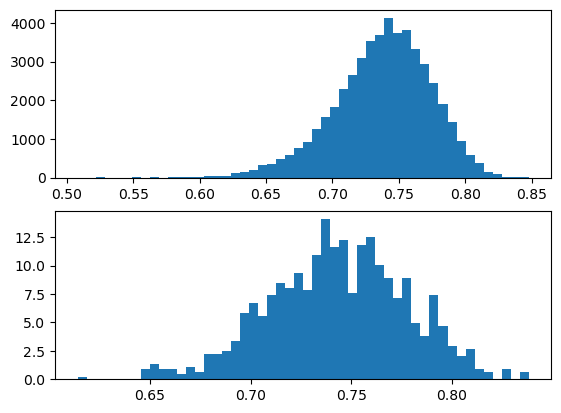

In [132]:
# CODE IS BORROWED AND AMENDED FROM AARONS GITHUB
rng = np.random.default_rng(1)

n = 51000
burn = 1000
rho = 0.5
rhos = np.zeros(n)
accepted = np.zeros(n)
unif_dist = rng.uniform(0, 1, size=n)

def accept_ratio(rho):
    sum_xi = 115.9707
    sum_yi = 105.9196
    sum_xiyi = 84.5247
    e = np.exp((-sum_xi + (2 * sum_xiyi * rho) - sum_yi) / (2 * (1 - rho**2)))
    den = (2 * np.pi * np.sqrt(1 - rho**2))**100
    right = 1 / (1 - rho**2)**(3/2)
    
    return (e / den) * right

for i in tqdm(range(n)):
    rho_prop = np.clip(rng.uniform(rho - 0.1, rho + 0.1), -0.99, 0.99)
    # proposal / current
    acceptance_ratio = accept_ratio(rho_prop) / accept_ratio(rho)
    decision = min(acceptance_ratio, 1)
    if unif_dist[i] < decision:
        rho = rho_prop
        accepted[i] = 1
    rhos[i] = rho

rhos = rhos[burn:]
print(f"{np.mean(rhos)=:.3f}")
print(f"{np.var(rhos)=:.3f}")
print(f"{np.sum(accepted)/n=:.3f}")

fig, ax = plt.subplots(2,1)
ax[0].hist(rhos, bins=50)
ax[1].hist(rhos[-1000:], bins=50, density=True)
plt.show()

$$\textbf{PART D}\\
\text{The acceptance rate for MCMC drops dramtically}
$$

100%|██████████| 51000/51000 [00:00<00:00, 133501.78it/s]


np.mean(rhos)=0.737
np.var(rhos)=0.001
np.sum(accepted)/n=0.057


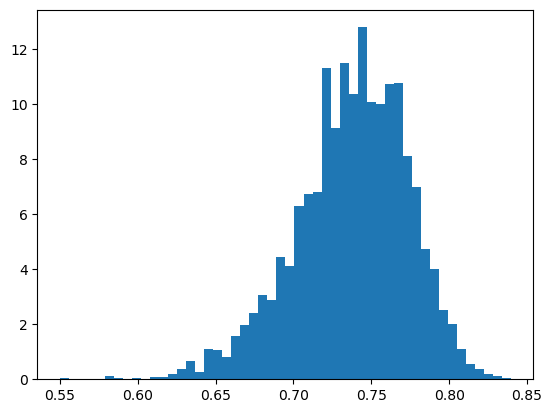

In [133]:
# CODE IS BORROWED AND AMENDED FROM AARONS GITHUB
rng = np.random.default_rng(1)

samples = 51000
burn = 1000
rho = 0.5
rhos = np.zeros(samples)
accepted = np.zeros(samples)
unif_dist = rng.uniform(0, 1, size=samples)

for i in tqdm(range(n)):
    rho_prop = rng.uniform(-1, 1)
    acceptance_ratio = accept_ratio(rho_prop) /  accept_ratio(rho)
    decision = min(acceptance_ratio, 1)
    if unif_dist[i] < decision:
        rho = rho_prop
        accepted[i] = 1
    rhos[i] = rho

rhos = rhos[burn:]

print(f"{np.mean(rhos)=:.3f}")
print(f"{np.var(rhos)=:.3f}")
print(f"{np.sum(accepted)/n=:.3f}")

plt.hist(rhos, bins=50, density=True)
plt.show()

$\textbf{QUESTION 2}$

$$
\textbf{PART A}
\\~\\
\text{T}_i \Rightarrow f(t_i | \lambda, \mu) = \lambda \mu e^{- \lambda \mu t_{i}}\\
\text{Prior on}\ (\lambda, \mu) \Rightarrow \pi(\lambda, \mu) \propto \lambda^{c-1} \mu^{d-1} e ^{-\alpha \lambda - \beta \mu}\\
\text{Posterior} = T_i * \pi(\lambda, \mu) = \left [ \prod_{i = 1}^{n} \lambda \mu e^{-\lambda \mu t_i} \right]\ \lambda ^{c-1} \mu^{d-1} e^{-\alpha \lambda -\beta \mu} \Rightarrow (\lambda \mu e^{-\lambda \mu t_i})^n \lambda ^{c-1} \mu^{d-1} e^{-\alpha \lambda -\beta \mu}
\\~\\
\pi (\lambda | \mu, t_i) =  (\lambda e^{-\lambda \mu t_i})^n \lambda^{c-1} e^{-\alpha \lambda} = \lambda^{c+n-1} e^{- \lambda(\alpha + \mu \sum t_i)} \Rightarrow Ga(n+c, \mu \sum_{i=1}^{n} t_i + \alpha) \\
\pi (\mu | \lambda, t_i) = (\mu e^{-\mu \lambda t_i})^n \mu^{d-1} e^{-\beta \mu} = \mu^{d+n-1} e^{-\mu(\beta + \lambda \sum t_i)} \Rightarrow Ga(n + d, \lambda \sum_{i=1}^{n} t_i + \beta)
\\~\\
\textbf{PART B}
\\~\\
$$

In [134]:
# CODE IS BORROWED AND AMENDED FROM AARONS GITHUB
samples = 21000
n = 20
burn = 1000
sum_ti = 522
c = 3
d = 1
alpha = 100
beta = 5
mu = 0.1

mus = np.zeros(samples)
lambdas = np.zeros(samples)

for i in tqdm(range(samples)):

    # scale = 1/rate; new beta = rate
    shape_lambda, scale_lambda = n + c, mu * sum_ti + alpha 
    lam = rng.gamma(shape=shape_lambda, scale=1/scale_lambda)
    shape_mu, scale_mu = n + d, lam * sum_ti + beta
    mu = rng.gamma(shape=shape_mu, scale=1/scale_mu)
    
    mus[i] = mu
    lambdas[i] = lam

mus = mus[burn:]
lambdas = lambdas[burn:]

100%|██████████| 21000/21000 [00:00<00:00, 259750.58it/s]


$$
\textbf{PART C}
$$

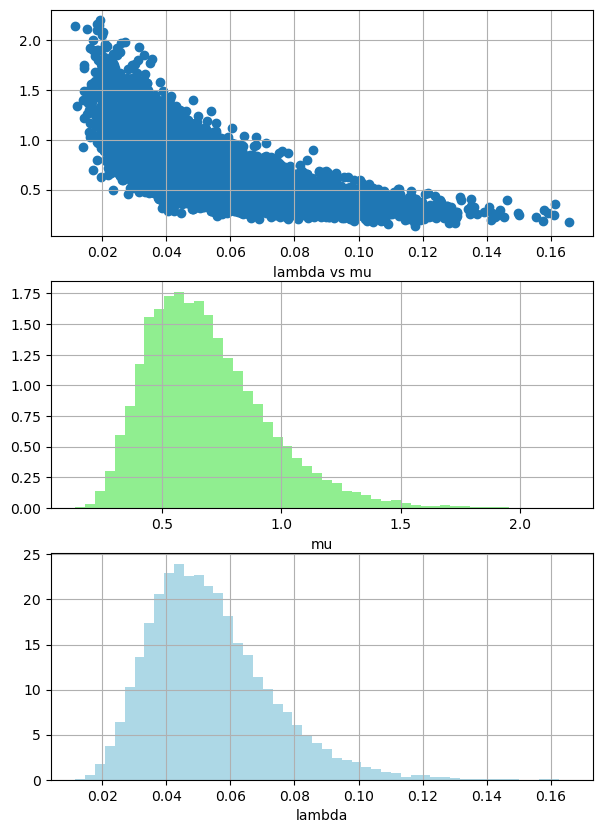

np.mean(mus)=0.6888543962149551
np.var(mus)=0.06478960959230473
np.mean(lambdas)=0.05387249201285851
np.var(lambdas)=0.0003566343653631951


In [137]:
# CODE IS BORROWED AND AMENDED FROM AARONS GITHUB
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 10))

# Scatterplot
ax1.grid(True)
ax1.scatter(lambdas, mus)
ax1.set_xlabel("lambda vs mu")

# Histogram 1
ax2.grid(True)
ax2.hist(mus, color="lightgreen", density=True, bins=50)
ax2.set_xlabel("mu")

# Histogram 2
ax3.grid(True)
ax3.hist(lambdas, color="lightblue", density=True, bins=50)
ax3.set_xlabel("lambda")

plt.show()

# Means and Variances
print(f"{np.mean(mus)=}")
print(f"{np.var(mus)=}")
print(f"{np.mean(lambdas)=}")
print(f"{np.var(lambdas)=}")

# Equitailed Credible Sets
# lower_eqt = gamma.ppf(0.025, a, scale=1/b)
# upper_eqt = gamma.ppf(0.975, a, scale=1/b)



$$
\textbf{PART D}
$$